In [1]:
import glob
import os
from datahandler import DataHandler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
plt.gray()

Using TensorFlow backend.
/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:

<Figure size 432x288 with 0 Axes>

In [2]:
def load_data_files():
    images_dir = os.path.join('data/imgs/*')
    image_files = sorted(glob.glob(images_dir))
    
    masks_dir = os.path.join('data/masks/*')
    masks_files = sorted(glob.glob(masks_dir))
    
    return zip(image_files, masks_files)

data_files = load_data_files()

dh = DataHandler()

images = []
masks = []

for img, msk in data_files:
    img, _ = dh.getImageData(img)
    images.append(img)
    
    mask, _ = dh.getImageData(msk, is_mask=True)
    masks.append(mask)

In [55]:
def getGen(images, masks):
    seed = 1
        
    data_gen_args = dict(
            horizontal_flip = True,
            vertical_flip = True,
            width_shift_range=0.1,
            height_shift_range=0.1,
            rotation_range = 90,
            brightness_range = (0.5, 1.5)) 
    
    image_datagen = ImageDataGenerator(**data_gen_args)
    
    mask_datagen = ImageDataGenerator(**data_gen_args)
    
    image_generator = image_datagen.flow(x = images, shuffle=False, batch_size=5, seed=seed)
    mask_generator = mask_datagen.flow(x = masks, shuffle=False, batch_size=5, seed=seed)
    
    return image_generator, mask_generator

imgs = images[4][20:35]
msks = masks[4][20:35]

img_gen, mask_gen = getGen(imgs, msks)
imgs_gen, msks_gen = img_gen.next(), mask_gen.next()

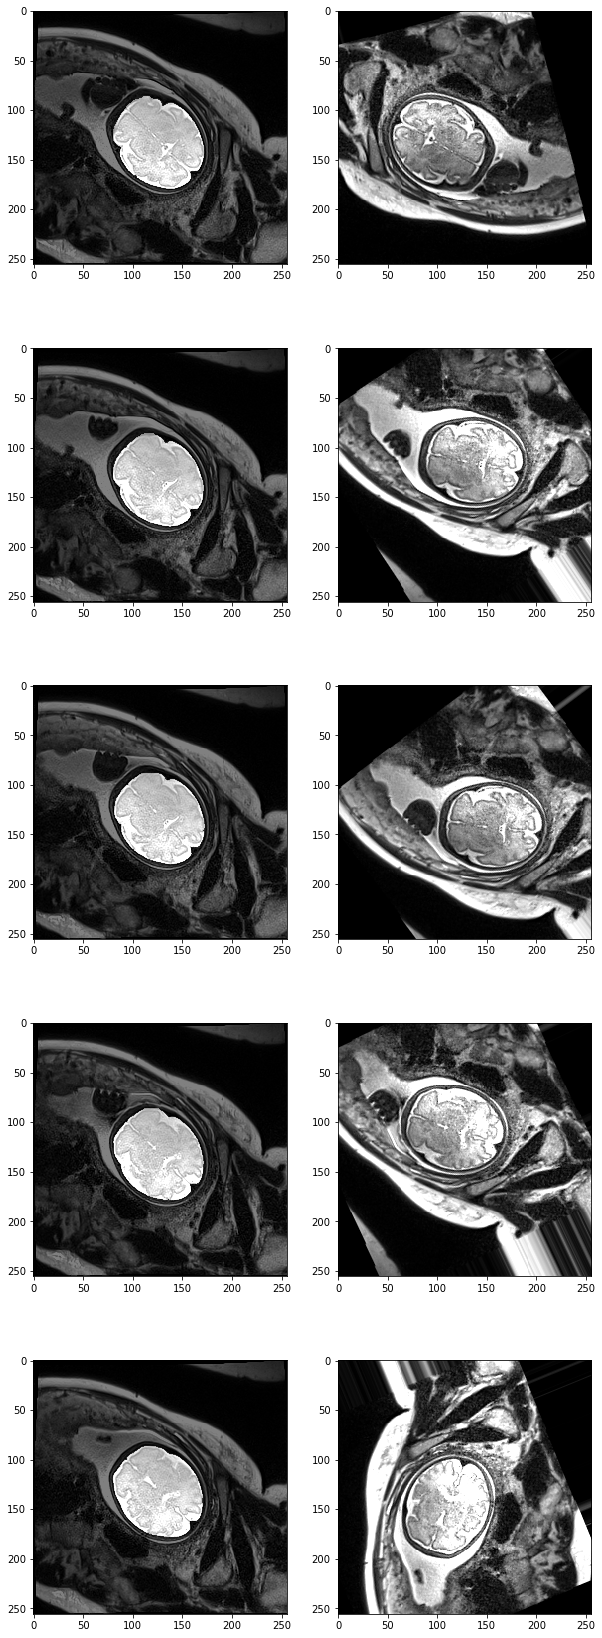

In [56]:
f, axarr = plt.subplots(5,2, figsize=(10, 30))
axarr[0,0].imshow(np.squeeze(imgs[0] + msks[0] * 255))
axarr[0,1].imshow(np.squeeze(imgs_gen[0]))

axarr[1,0].imshow(np.squeeze(imgs[1] + msks[1] * 255))
axarr[1,1].imshow(np.squeeze(imgs_gen[1]))

axarr[2,0].imshow(np.squeeze(imgs[2] + msks[2] * 255))
axarr[2,1].imshow(np.squeeze(imgs_gen[2]))

axarr[3,0].imshow(np.squeeze(imgs[3] + msks[3] * 255))
axarr[3,1].imshow(np.squeeze(imgs_gen[3]))

axarr[4,0].imshow(np.squeeze(imgs[4] + msks[4] * 255))
axarr[4,1].imshow(np.squeeze(imgs_gen[4]))